In [2]:
import numpy as np
import matplotlib.pyplot as plt
#Take into account computational..?

In [3]:
dt = 0.001
tNum = 50000
t0 = 0
g = 9.81
l, m = 1, 1
omega = np.sqrt(g / l) 
theta0 = 0.2
thetaDot0 = 0
u0 = np.array((theta0, thetaDot0))

def f(t, u): #differential equation. u = [theta, thetaDot]
    return np.array([u[1], - omega**2 *np.sin(u[0])]) 


def ec_g(t, u): #differential equation for the Euler-Cromer method.
    return - omega**2 * np.sin(u[0])

def Energy(Y): #Y is array containing vectors with theta, thetaDot at different times
    return Pot(Y) + Kin(Y)

def Pot(Y):
    return  m * g *(1 - np.cos(Y.T[0])) * l

def Kin(Y):
    return 0.5 * m * ( l * Y.T[1])**2



In [4]:
def Kutta4(f, u0, t0, tNum, dt):
    U = np.zeros( ((tNum),  u0.size) )
    U[0] = u0
    for i in range(1 ,tNum):
        F1 = f(i * dt, U[i-1])
        F2 = f(i * dt + dt / 2, U[i-1] + dt  / 2 * F1)
        F3 = f(i * dt + dt / 2, U[i-1] + dt / 2 * F2)
        F4 = f(i * dt + dt, U[i-1] + dt * F3)
        U[i] = U[i-1] + dt / 6 * (F1 + 2* F2 + 2 * F3 + F4)        
    return U

def EulersMethod(f, u0, t0, tNum, dt ):
    #tf = t0 + dt * tNum
    U = np.zeros(( tNum, 2))
    U[0] = u0
    for i in range(1, tNum):
        U[i] = U[i-1] + f(i * dt, U[i-1]) * dt  
    return U

def Euler_Cromer(g, u0, t0, tNum, dt):
    U = np.zeros((tNum, 2))
    U[0] = u0
    for i in range(1, tNum):
        U[i][1] = U[i-1][1] + g(0, U[i-1]) * dt
        U[i][0] = U[i-1][0] + U[i][1] * dt
    return U

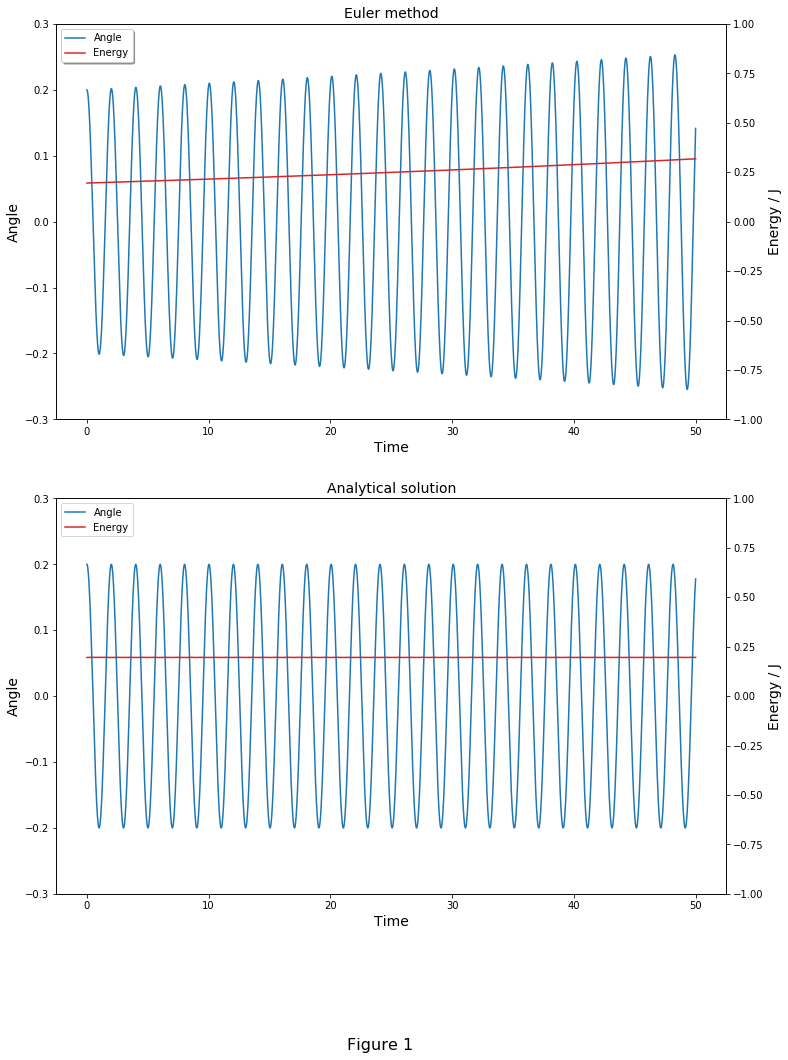

In [51]:
Y = EulersMethod(f, u0 , t0 , tNum , dt )
T = np.linspace(t0, t0 + dt * tNum, tNum)

fig, (ax1, ax3) = plt.subplots(2,1)
fig.set_size_inches(12, 16)
fig.suptitle("Figure 1", fontsize = 16, y = -0)

l1, = ax1.plot(T, Y.T[0]) #Plotter vinkelen mot tiden
ax1.set_title("Euler method", fontsize = 14)
ax1.set_xlabel("Time", fontsize = 14)
ax1.set_ylabel("Angle", fontsize = 14)
ax1.set(ylim = (-0.3, 0.3))

ax2 = ax1.twinx() #Ny axis som deler x-akse med ax1
l2, = ax2.plot(T, Energy(Y), color = 'tab:red')
ax2.set_ylabel("Energy / J", fontsize = 14)
ax2.set(ylim = (-1, 1))
ax2.legend((l1, l2), ('Angle', 'Energy'), loc='upper left', shadow=True)#legend for ax1 og ax2

ax3.set_title("Analytical solution", fontsize = 14)
ax3.set_xlabel("Time", fontsize = 14)
ax3.set_ylabel("Angle", fontsize = 14)
YA = np.zeros((tNum, 2))
YA[:, 0] = u0[0] * np.cos(omega * T)
YA[:, 1] = - u0[0] * omega * np.sin(omega * T)
l3, = ax3.plot(T, YA.T[0]) #Analytical solutio
ax3.set(ylim = (-0.3, 0.3))

ax4 = ax3.twinx()
l4, = ax4.plot(T, Energy(YA), color = "tab:red" )
ax4.set(ylim = (-1, 1))
ax4.set_ylabel("Energy / J", fontsize = 14)
ax3.legend((l3, l4), ("Angle", "Energy"), loc = "upper left")

plt.show()

### Diskusjon oppgave 1
From figure 1 it is clear that the Euler equation solves the 

# Oppgave 2

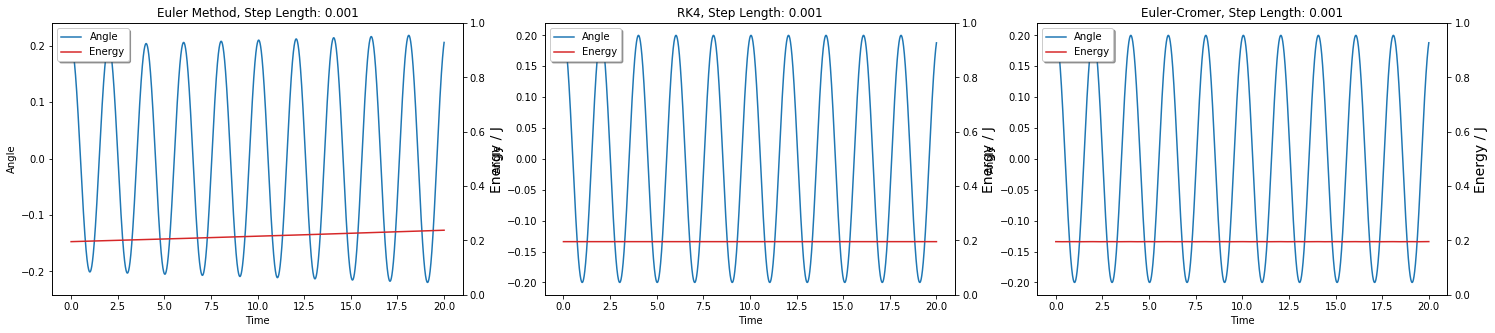

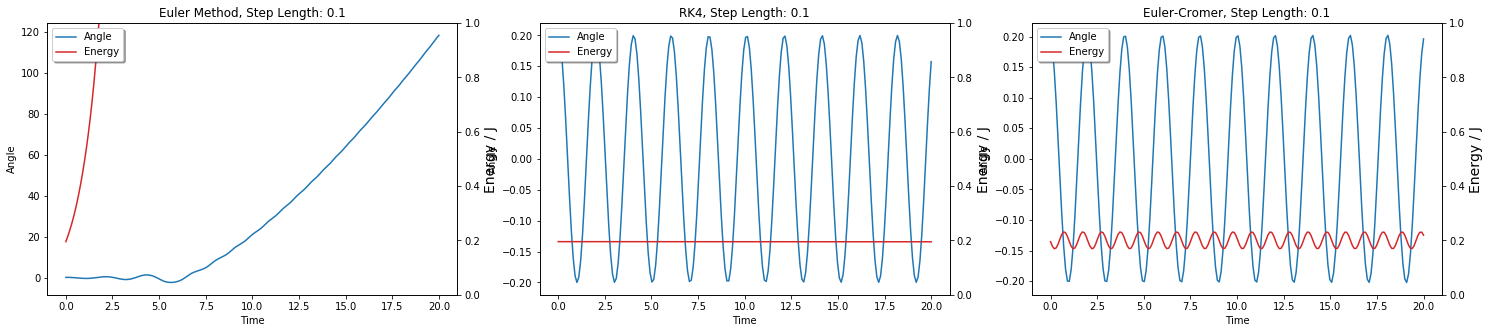

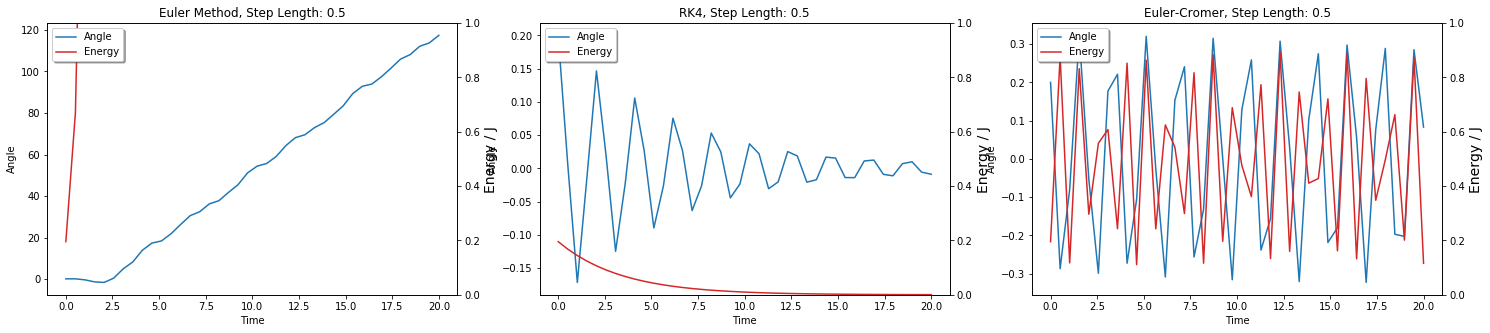

In [53]:
def plot_comparison(u0,t0,tNum,dt):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    fig.set_size_inches(25, 5)
    
    T = np.linspace(t0, t0 + dt * tNum, tNum)
    
    ax1.set_title("Euler Method, Step Length: " + str(dt))
    ax1.set_xlabel("Time", )
    ax1.set_ylabel("Angle")
    #ax1.set(ylim = (-0.35, 0.35))
    UE = EulersMethod(f, u0 , t0 , tNum , dt )
    l1, = ax1.plot(T,UE.T[0])
    ax11 = ax1.twinx()
    l11, = ax11.plot(T, Energy(UE), color = 'tab:red')
    ax11.set_ylabel("Energy / J", fontsize = 14, position = (0.8, 0.5))
    ax11.set(ylim = (0, 1))
    ax11.legend((l1, l11), ('Angle', 'Energy'), loc='upper left', shadow=True)
    
    ax2.set_title("RK4, Step Length: " + str(dt))
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Angle")
    #ax2.set(ylim = (-0.35, 0.35))
    UK = Kutta4(f, u0, t0, tNum,  dt)
    l2, = ax2.plot(T, UK.T[0])
    ax22 = ax2.twinx()
    l22, = ax22.plot(T, Energy(UK), color = 'tab:red')
    ax22.set_ylabel("Energy / J", fontsize = 14)
    ax22.set(ylim = (0, 1))
    ax22.legend((l2, l22), ('Angle', 'Energy'), loc='upper left', shadow=True)
    
    ax3.set_title("Euler-Cromer, Step Length: " + str(dt))
    ax3.set_xlabel("Time")
    ax3.set_ylabel("Angle")
    #ax3.set(ylim = (-0.35, 0.35))
    UE_C = Euler_Cromer(ec_g, u0, t0, tNum,dt)
    l3, = ax3.plot(T,UE_C.T[0])
    ax33 = ax3.twinx()
    l33, = ax33.plot(T, Energy(UE_C), color = 'tab:red')
    ax33.set_ylabel("Energy / J", fontsize = 14)
    ax33.set(ylim = (0, 1))
    ax33.legend((l3, l33), ('Angle', 'Energy'), loc='upper left', shadow=True)
    
    plt.show()
    
tNum2, dt2 = 20000, 0.001
plot_comparison(u0,t0,tNum2, dt2)

tNum2, dt2 = 200, 0.1
plot_comparison(u0,t0,tNum2, dt2)

tNum2, dt2 = 40, 0.5
plot_comparison(u0,t0,tNum2, dt2)
    

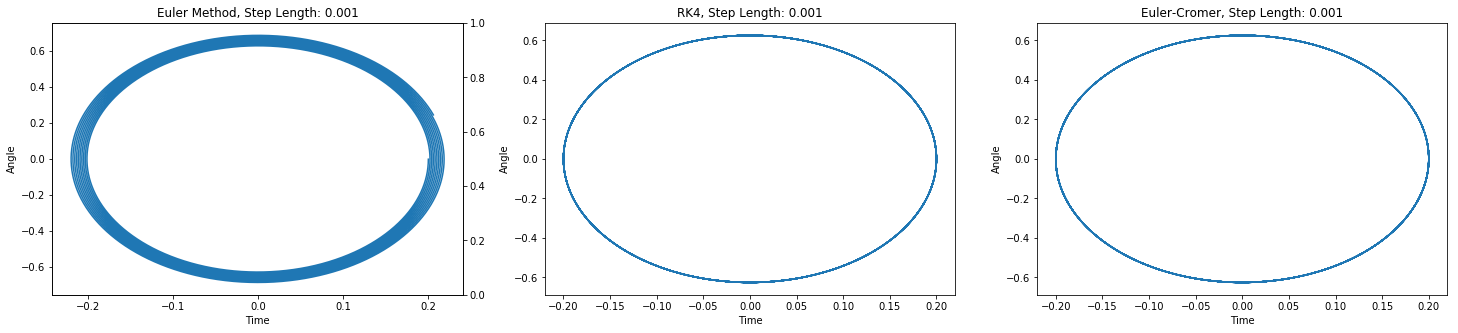

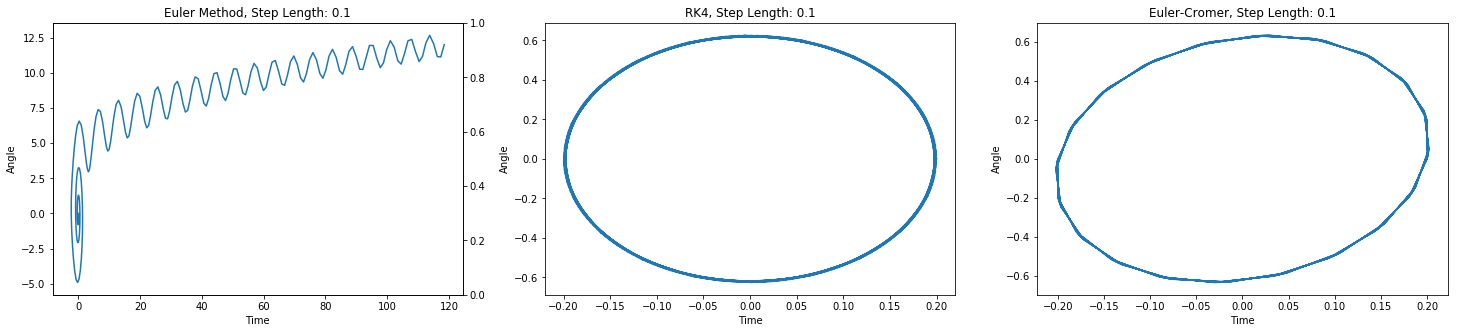

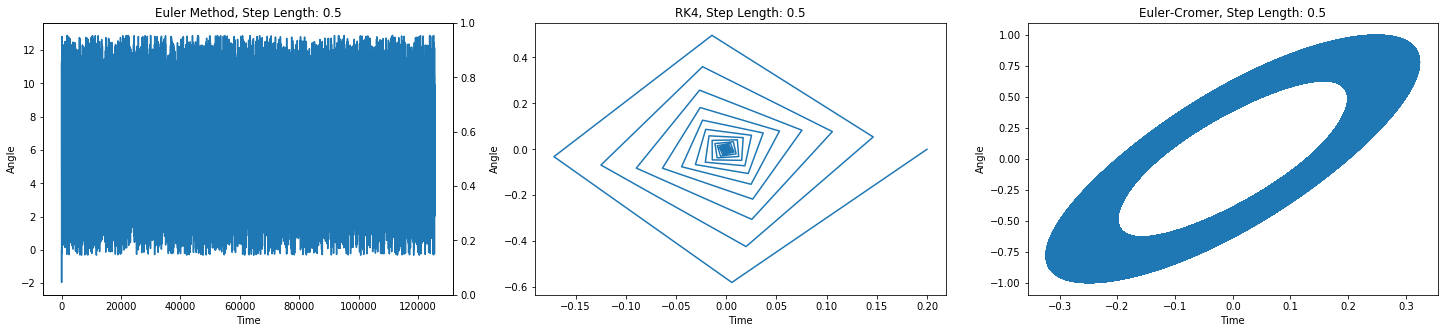

In [24]:
def plot_phase_comparison(u0,t0,tNum,dt):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    fig.set_size_inches(25, 5)
    
    T = np.linspace(t0, t0 + dt * tNum, tNum)
    
    ax1.set_title("Euler Method, Step Length: " + str(dt))
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Angle")
    UE = EulersMethod(f, u0 , t0 , tNum , dt )
    ax1.plot(UE.T[0],UE.T[1])
    ax11 = ax1.twinx()
    
    
    ax2.set_title("RK4, Step Length: " + str(dt))
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Angle")
    UK = Kutta4(f, u0,t0, tNum, dt)
    ax2.plot(UK.T[0], UK.T[1])
    
    ax3.set_title("Euler-Cromer, Step Length: " + str(dt))
    ax3.set_xlabel("Time")
    ax3.set_ylabel("Angle")
    UE_C = Euler_Cromer(ec_g, u0, t0, tNum,dt)
    ax3.plot(UE_C.T[0],UE_C.T[1])
    plt.show()

tNum3, dt3 = 20000, 0.001
plot_phase_comparison(u0,t0,tNum3,dt3)

tNum3, dt3 = 200, 0.1
plot_phase_comparison(u0,t0,tNum3,dt3)

tNum3, dt3 = 40000, 0.5
plot_phase_comparison(u0,t0,tNum3,dt3)